In [8]:
import numpy as np
from PIL import Image
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt

def calculate_psnr_with_scaling(generated_image_path: str, reference_image_path: str) -> float:
    try:
        generated = Image.open(generated_image_path)
        reference = Image.open(reference_image_path)
        
        reference_downsampled = reference.resize((32, 32), Image.BICUBIC)
        reference_upsampled = reference_downsampled.resize((256, 256), Image.BICUBIC)

        fig, ax = plt.subplots(1,3)
        ax[0].imshow(reference)
        ax[1].imshow(reference_upsampled)
        ax[2].imshow(generated)
        
        generated_array = np.array(generated)
        reference_array = np.array(reference)
        reference_downsampled_array = np.array(reference_upsampled)
            
        psnr_naive = psnr(reference_array, reference_downsampled_array)
        psnr_real = psnr(reference_array, generated_array)
        return psnr_naive, psnr_real
        
    except Exception as e:
        print(f"Error calculating PSNR: {str(e)}")
        return None


1 26.91597567461433 20.671034691851446
2 32.68746000511655 23.39659196092803
3 39.56296333536422 24.000401603478988
4 29.883006379093047 22.874130933666304
5 31.477244438336363 21.8683577683369
6 30.42884974223159 23.554001167566106
7 27.99175817007161 22.410121601323656
8 25.473663949626484 19.13992607763339
9 35.75591113230427 25.678238294313786
10 32.54288176123442 20.02053366733959
11 31.239668354806575 22.573119839277673
12 30.240447587353444 24.067177025500026
13 31.76791998178244 21.419123552314367
31.228288500918104 22.436366014117713


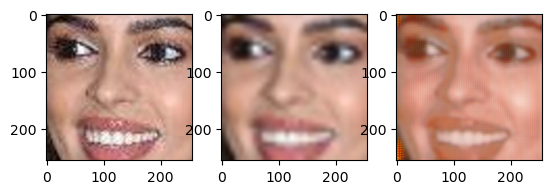

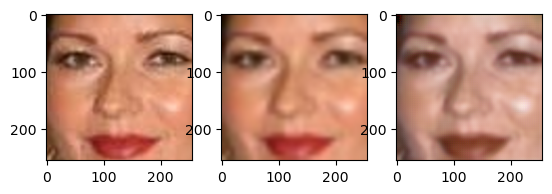

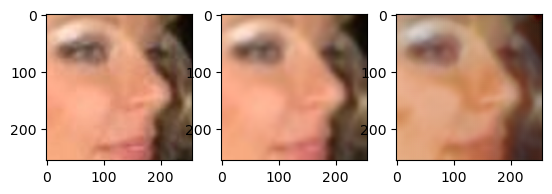

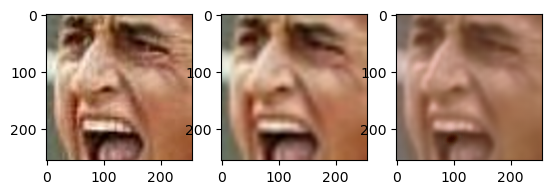

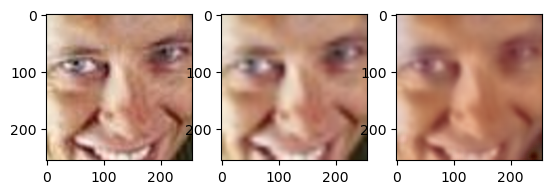

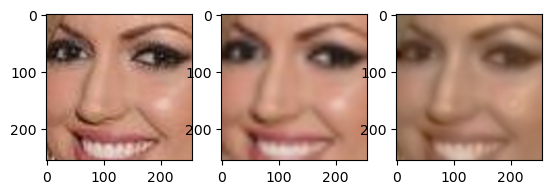

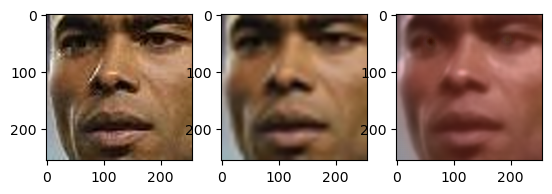

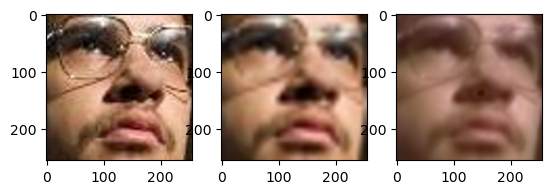

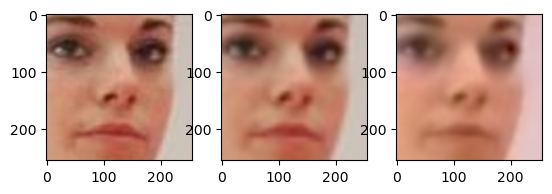

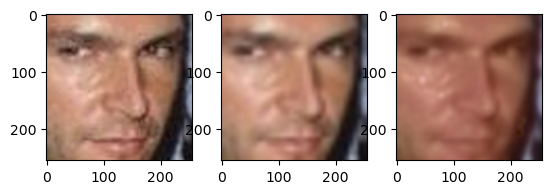

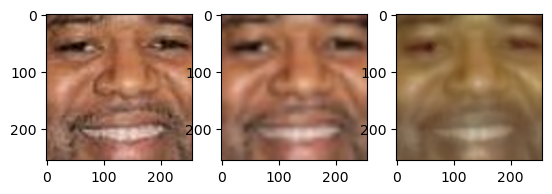

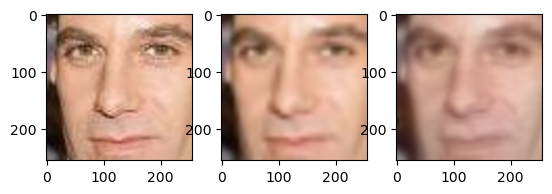

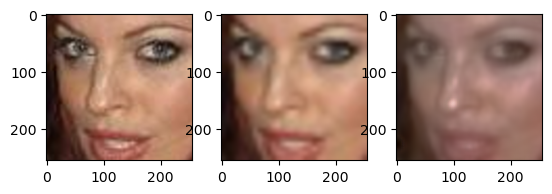

In [11]:
path = '/projectnb/ec523kb/projects/teams_Fall_2024/Team_1/cyclegan_nina/CycleGAN/checkpoints/HR2LR/web/images/'
psnr_naive_all = 0
psnr_real_all = 0
for n in range(1,14):
    psnr_naive, psnr_real = calculate_psnr_with_scaling(path+f'epoch0{n:02d}_fake_B.png', path+f'epoch0{n:02d}_real_A.png')
    psnr_naive_all += psnr_naive/13
    psnr_real_all += psnr_real/13
    print(n, psnr_naive, psnr_real)
print(psnr_naive_all, psnr_real_all)